In [1]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + static_features + time_features



{'random': {'ASR': 1.4722222222222223, 'time_to_compromise': 1.4603948226782104, 'attack_path_exposure': 0.9348264463432924, 'ROA': 0.9697659132970131, 'risk': 0.9431901373556011}, 'alternative': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4542807503335515, 'attack_path_exposure': 0.933710809264223, 'ROA': 0.8804550194683819, 'risk': 0.9569099223197343}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7364291794035274, 'attack_path_exposure': 0.9365137503823221, 'ROA': 0.9942248916217096, 'risk': 1.061993912898598}}


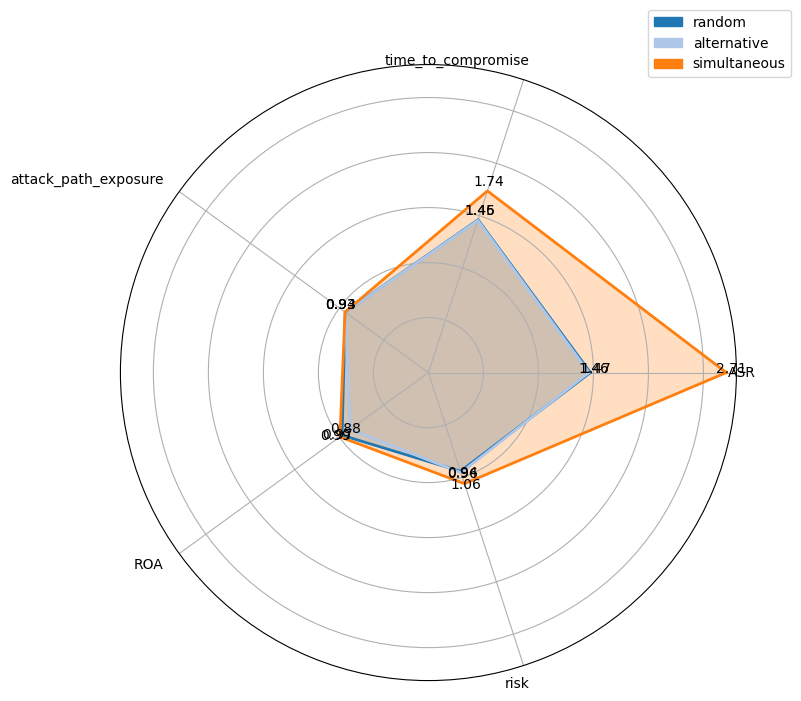

In [3]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [4]:
other_schemes =pd.DataFrame(schemes_data)

In [5]:
other_schemes

,random,alternative,simultaneous
ASR,1.472222,1.458333,2.708333
time_to_compromise,1.460395,1.454281,1.736429
attack_path_exposure,0.934826,0.933711,0.936514
ROA,0.969766,0.880455,0.994225
risk,0.943190,0.956910,1.061994


In [6]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
        metric,
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity"
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [7]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
mtd_interval,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MEF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ASR,1.527778,1.472222,1.611111,1.500000,1.500000,1.527778,1.472222,1.666667,1.500000,1.500000,...,1.500000,1.472222,1.625000,1.527778,1.500000,1.500000,1.472222,1.611111,1.500000,1.489510
time_to_compromise,1.545631,1.472419,1.512724,1.696604,1.629049,1.535351,1.473507,1.514567,1.704895,1.625636,...,1.526821,1.481007,1.520235,1.724911,1.622033,1.530234,1.467154,1.528115,1.706132,1.609597
host_compromise_ratio,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,...,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826,0.847826
network_size,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
exposed_endpoints,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
attack_path_exposure,2.451284,2.236797,1.903657,2.684156,2.601385,2.460476,2.211664,1.916010,2.659974,2.589975,...,2.440142,2.211664,1.872610,2.689045,2.592249,2.460476,2.211664,1.901963,2.659974,2.589975
ROA,1.128493,1.149689,1.050264,1.152941,1.138042,1.156150,1.078217,1.150830,1.167001,1.122988,...,1.191539,1.087530,1.190861,1.121795,1.064459,1.089260,1.133597,1.066705,1.198155,1.103751
risk,1.039836,1.103160,1.017596,1.069052,1.056053,1.041980,1.046188,1.040440,1.081417,1.046215,...,1.058301,1.005719,1.135306,1.040615,1.010882,1.043271,1.094836,1.012745,1.085041,0.997177


In [8]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

In [9]:
chart.process_weighted_metrics(other_schemes)

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
random,1.472222,1.460395,0.934826,0.969766,0.943190,5.780400,-0.527605,0.055143
alternative,1.458333,1.454281,0.933711,0.880455,0.956910,5.683690,-0.625705,0.000000
simultaneous,2.708333,1.736429,0.936514,0.994225,1.061994,7.437495,1.153311,1.000000


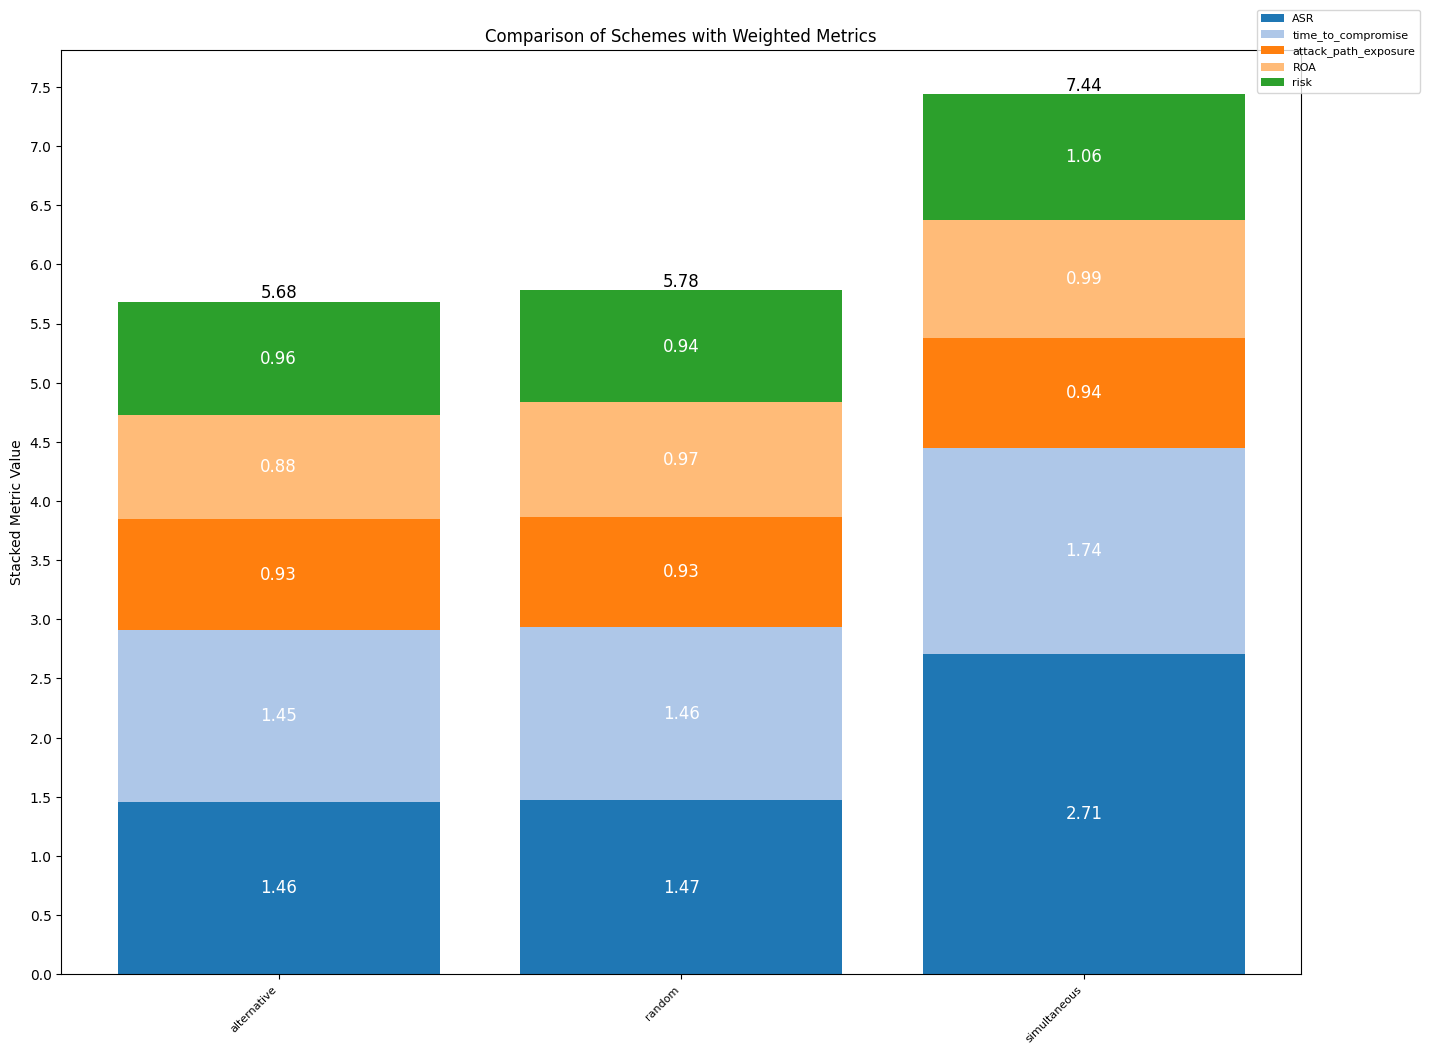

In [10]:
chart.plot_n_schemes()

In [11]:
combined_data = pd.concat([pd.DataFrame(data), other_schemes], axis=1)
chart.process_weighted_metrics(data)

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
all_features,1.527778,1.545631,2.451284,1.128493,1.039836,7.693023,0.136662,0.523460
all_features_CompleteTopologyShuffle,1.472222,1.472419,2.236797,1.149689,1.103160,7.434287,-0.602445,0.296851
all_features_IPShuffle,1.611111,1.512724,1.903657,1.050264,1.017596,7.095351,-1.570654,0.000000
all_features_OSDiversity,1.500000,1.696604,2.684156,1.152941,1.069052,8.102752,1.307100,0.882314
all_features_ServiceDiversity,1.500000,1.629049,2.601385,1.138042,1.056053,7.924528,0.797982,0.726219
host_compromise_ratio,1.527778,1.535351,2.460476,1.156150,1.041980,7.721734,0.218680,0.548606
host_compromise_ratio_CompleteTopologyShuffle,1.472222,1.473507,2.211664,1.078217,1.046188,7.281797,-1.038049,0.163296
host_compromise_ratio_IPShuffle,1.666667,1.514567,1.916010,1.150830,1.040440,7.288514,-1.018862,0.169178
host_compromise_ratio_OSDiversity,1.500000,1.704895,2.659974,1.167001,1.081417,8.113288,1.337195,0.891541
host_compromise_ratio_ServiceDiversity,1.500000,1.625636,2.589975,1.122988,1.046215,7.884814,0.684535,0.691437


In [12]:
combined_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity,random,alternative,simultaneous
ASR,1.527778,1.472222,1.611111,1.500000,1.500000,1.527778,1.472222,1.666667,1.500000,1.500000,...,1.527778,1.500000,1.500000,1.472222,1.611111,1.500000,1.489510,1.472222,1.458333,2.708333
time_to_compromise,1.545631,1.472419,1.512724,1.696604,1.629049,1.535351,1.473507,1.514567,1.704895,1.625636,...,1.724911,1.622033,1.530234,1.467154,1.528115,1.706132,1.609597,1.460395,1.454281,1.736429
attack_path_exposure,2.451284,2.236797,1.903657,2.684156,2.601385,2.460476,2.211664,1.916010,2.659974,2.589975,...,2.689045,2.592249,2.460476,2.211664,1.901963,2.659974,2.589975,0.934826,0.933711,0.936514
ROA,1.128493,1.149689,1.050264,1.152941,1.138042,1.156150,1.078217,1.150830,1.167001,1.122988,...,1.121795,1.064459,1.089260,1.133597,1.066705,1.198155,1.103751,0.969766,0.880455,0.994225
risk,1.039836,1.103160,1.017596,1.069052,1.056053,1.041980,1.046188,1.040440,1.081417,1.046215,...,1.040615,1.010882,1.043271,1.094836,1.012745,1.085041,0.997177,0.943190,0.956910,1.061994


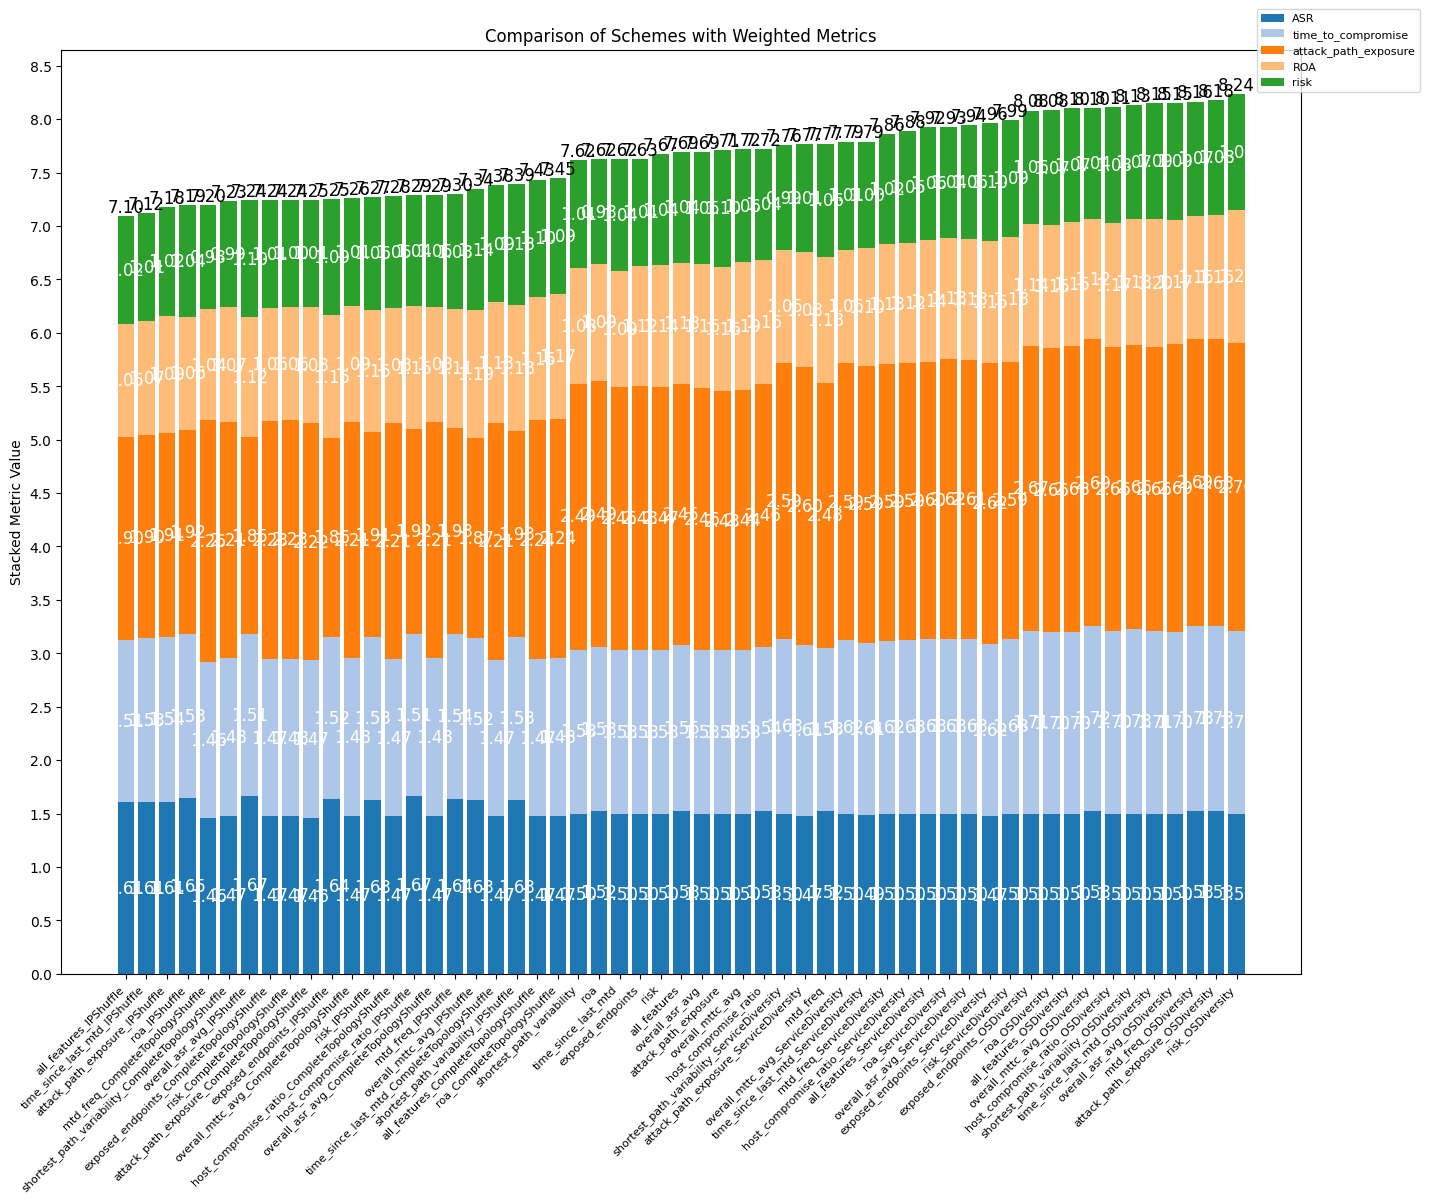

In [13]:
chart.plot_n_schemes()

Feature: all_features_IPShuffle, Combination: All Features + Shuffling
Feature: time_since_last_mtd_IPShuffle, Combination: Dynamic + Shuffling
Feature: attack_path_exposure_IPShuffle, Combination: Static + Shuffling
Feature: roa_IPShuffle, Combination: Static + Shuffling
Feature: mtd_freq_CompleteTopologyShuffle, Combination: Dynamic + Shuffling
Feature: shortest_path_variability_CompleteTopologyShuffle, Combination: Dynamic + Shuffling
Feature: overall_asr_avg_IPShuffle, Combination: Dynamic + Shuffling
Feature: exposed_endpoints_CompleteTopologyShuffle, Combination: Static + Shuffling
Feature: risk_CompleteTopologyShuffle, Combination: Static + Shuffling
Feature: attack_path_exposure_CompleteTopologyShuffle, Combination: Static + Shuffling
Feature: exposed_endpoints_IPShuffle, Combination: Static + Shuffling
Feature: overall_mttc_avg_CompleteTopologyShuffle, Combination: Dynamic + Shuffling
Feature: risk_IPShuffle, Combination: Static + Shuffling
Feature: host_compromise_ratio_Compl

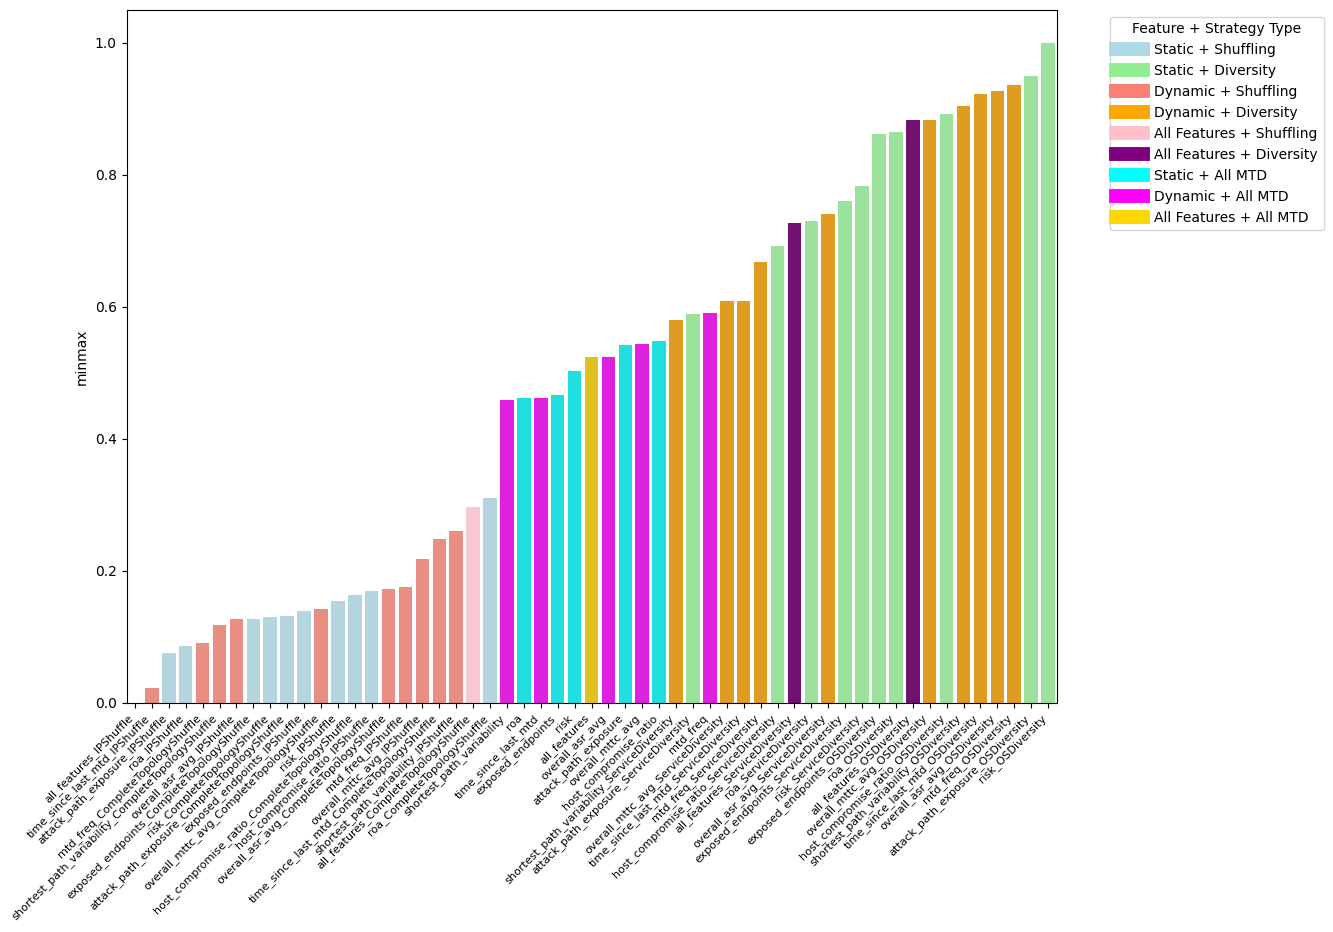

In [14]:
chart.normalized_chart()

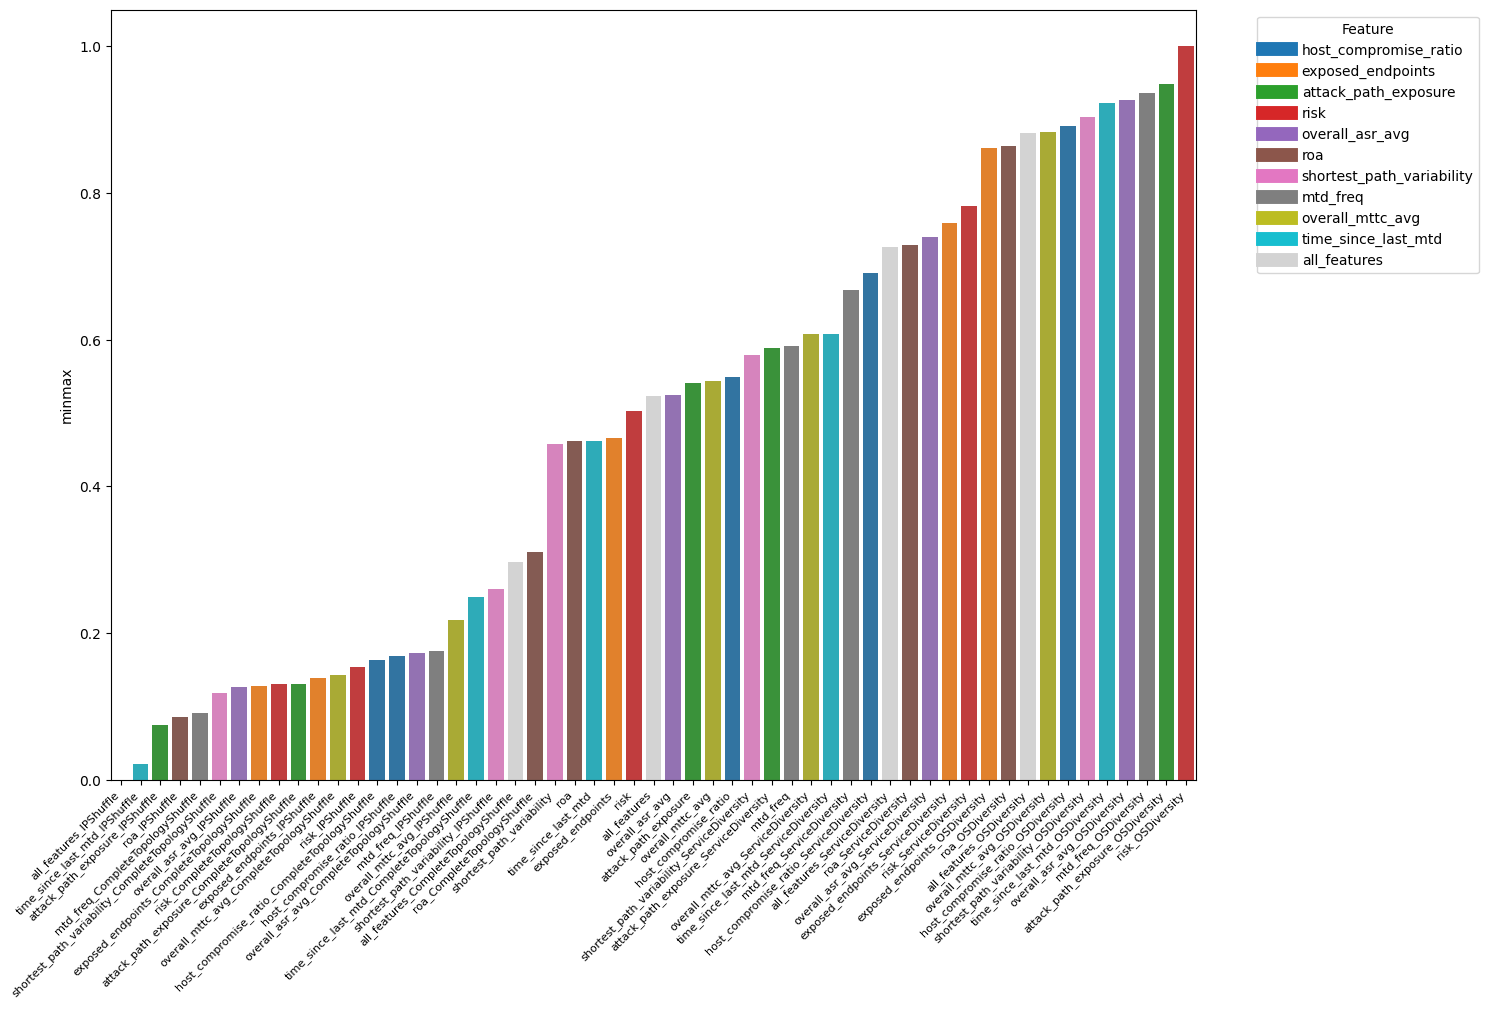

In [15]:
chart.features_only_chart()

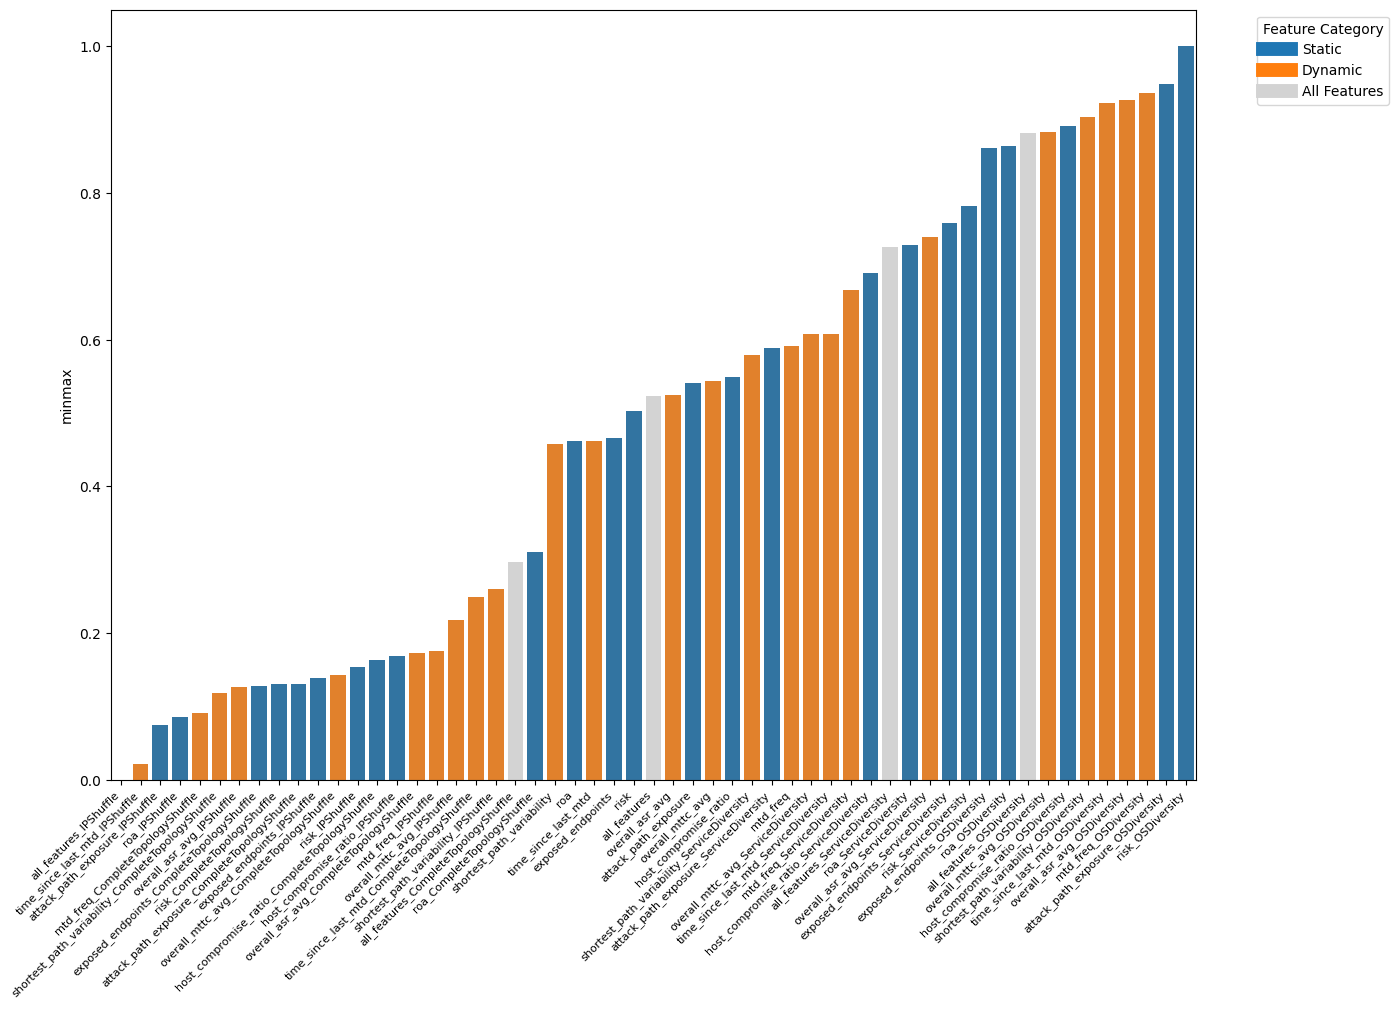

In [16]:
chart.feature_type_only_chart()

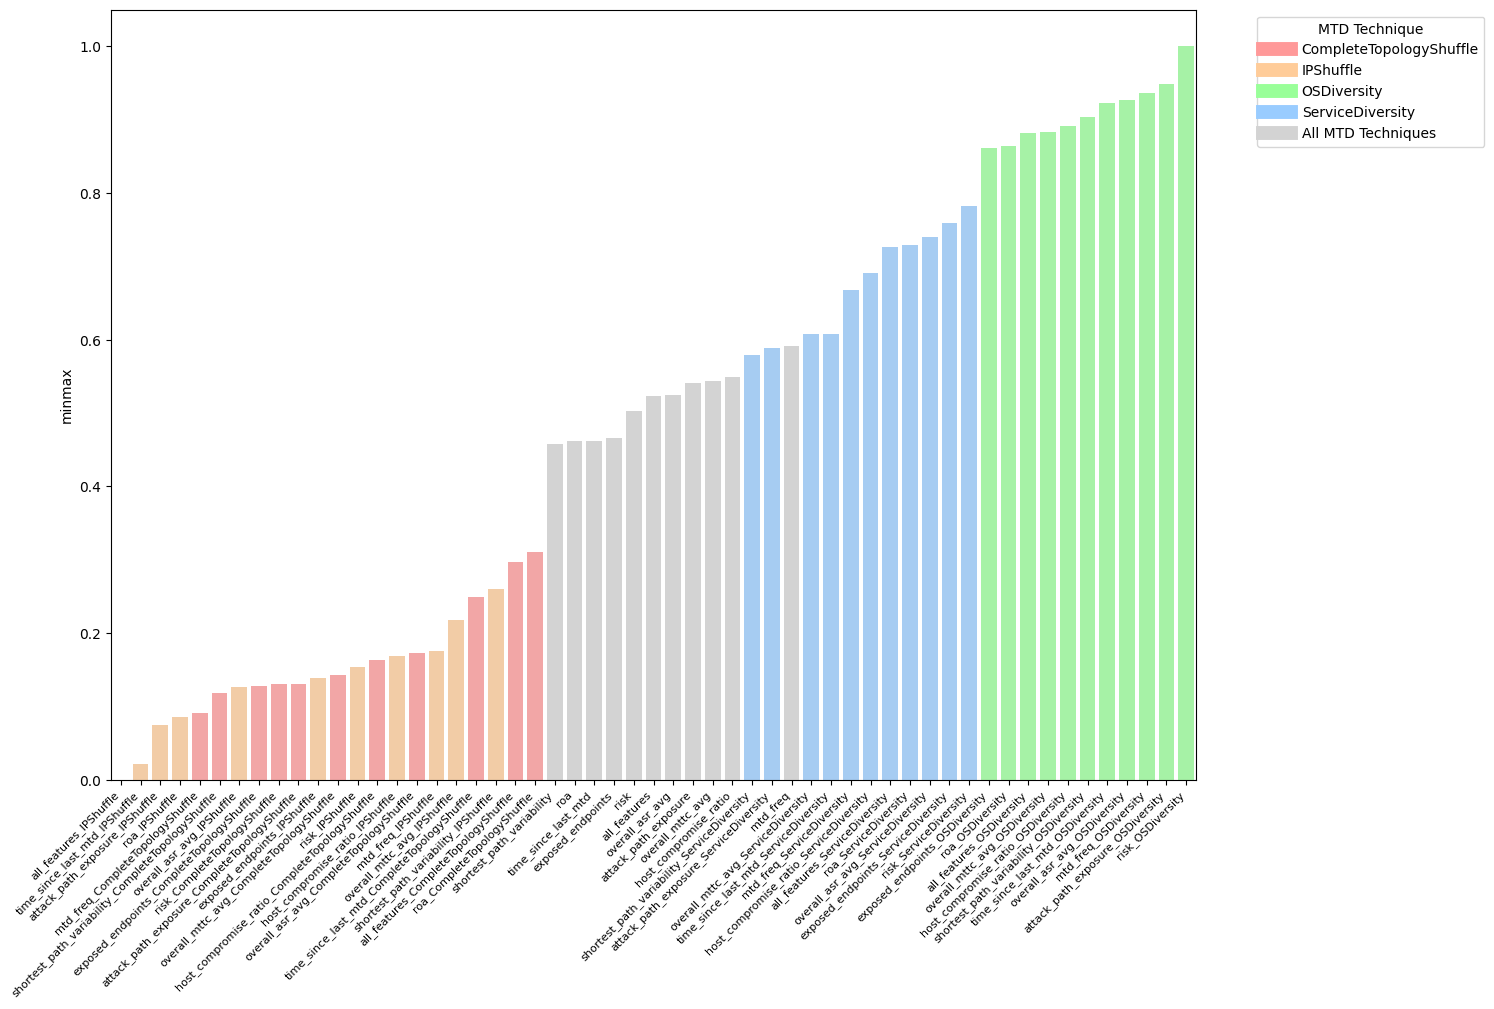

In [17]:
chart.mtd_techniques_chart()

In [18]:
# chart.all_combinations_chart()
# 

In [19]:
data = pd.DataFrame(data)

In [20]:
data.loc['sum'] = data.sum(axis=0)

In [21]:
def group_columns_by_mtd(df):
    mtd_strategies = ['CompleteTopologyShuffle', 'IPShuffle', 'OSDiversity', 'ServiceDiversity']
    
    # Initialize empty groups
    groups = {
        'All MTD': [],
        'CompleteTopologyShuffle': [],
        'IPShuffle': [],
        'OSDiversity': [],
        'ServiceDiversity': []
    }

    # Iterate through each column name in the DataFrame
    for col in df.columns:
        # Check if the column contains any MTD strategy
        if any(mtd in col for mtd in mtd_strategies):
            # Group by the specific MTD strategy found in the column
            for mtd in mtd_strategies:
                if mtd in col:
                    groups[mtd].append(col)
                    break
        else:
            # If no MTD strategy is found in the column, it belongs to 'All MTD'
            groups['All MTD'].append(col)

    return groups


In [22]:
groups = group_columns_by_mtd(data)
import seaborn as sns

In [23]:
for mtd in groups:
    df = data[groups[mtd]].T
    
    print(df)

                                ASR  time_to_compromise  attack_path_exposure  \
all_features               1.527778            1.545631              2.451284   
host_compromise_ratio      1.527778            1.535351              2.460476   
exposed_endpoints          1.500000            1.526280              2.478623   
attack_path_exposure       1.500000            1.527374              2.428102   
overall_asr_avg            1.500000            1.529911              2.456382   
roa                        1.524298            1.530499              2.494779   
shortest_path_variability  1.500000            1.533368              2.491621   
risk                       1.500000            1.526909              2.467158   
mtd_freq                   1.524298            1.525009              2.481152   
overall_mttc_avg           1.500000            1.526821              2.440142   
time_since_last_mtd        1.500000            1.530234              2.460476   

                           

In [24]:
dynamic_metrics = [
    'time_since_last_mtd', 'overall_mttc_avg', 'mtd_freq'
]

static_metrics = [
    'exposed_endpoints', 'host_compromise_ratio', 
    'attack_path_exposure', 'roa',
     'risk', 'shortest_path_variability', 'overall_asr_avg', 
]

metrics = ["all_features"] + static_metrics + dynamic_metrics

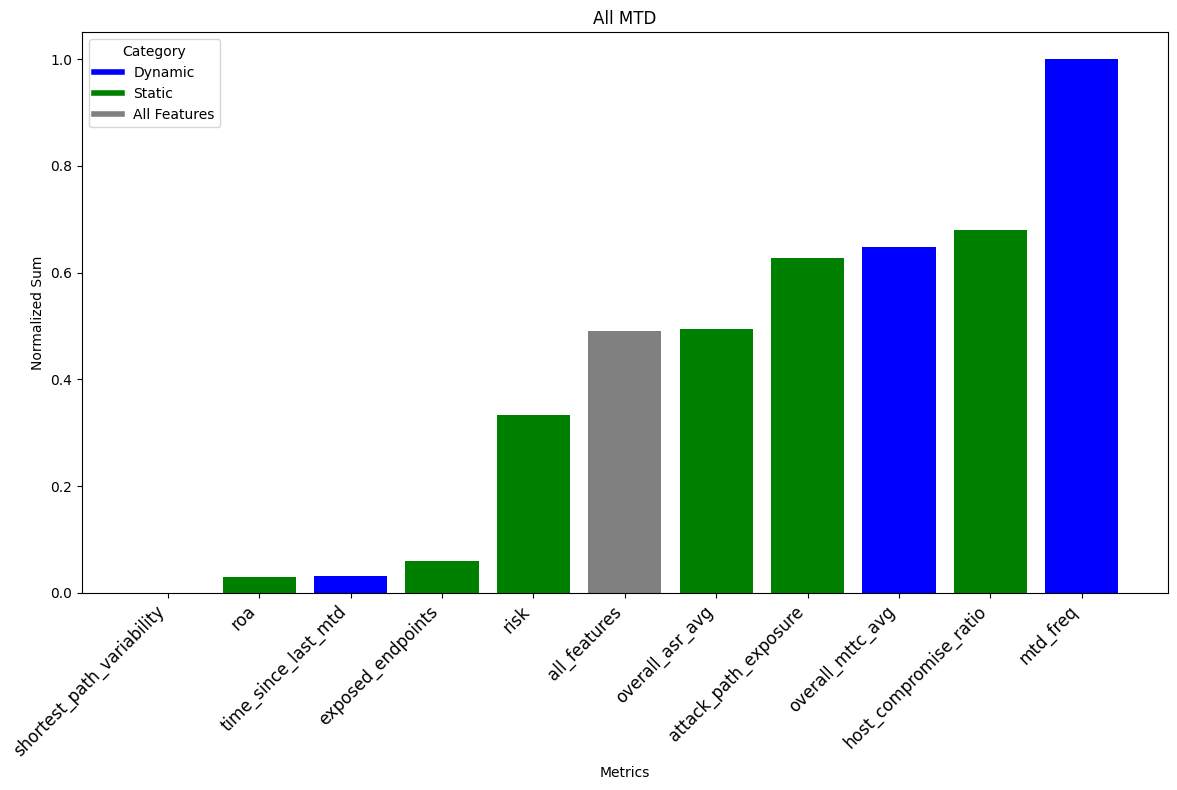

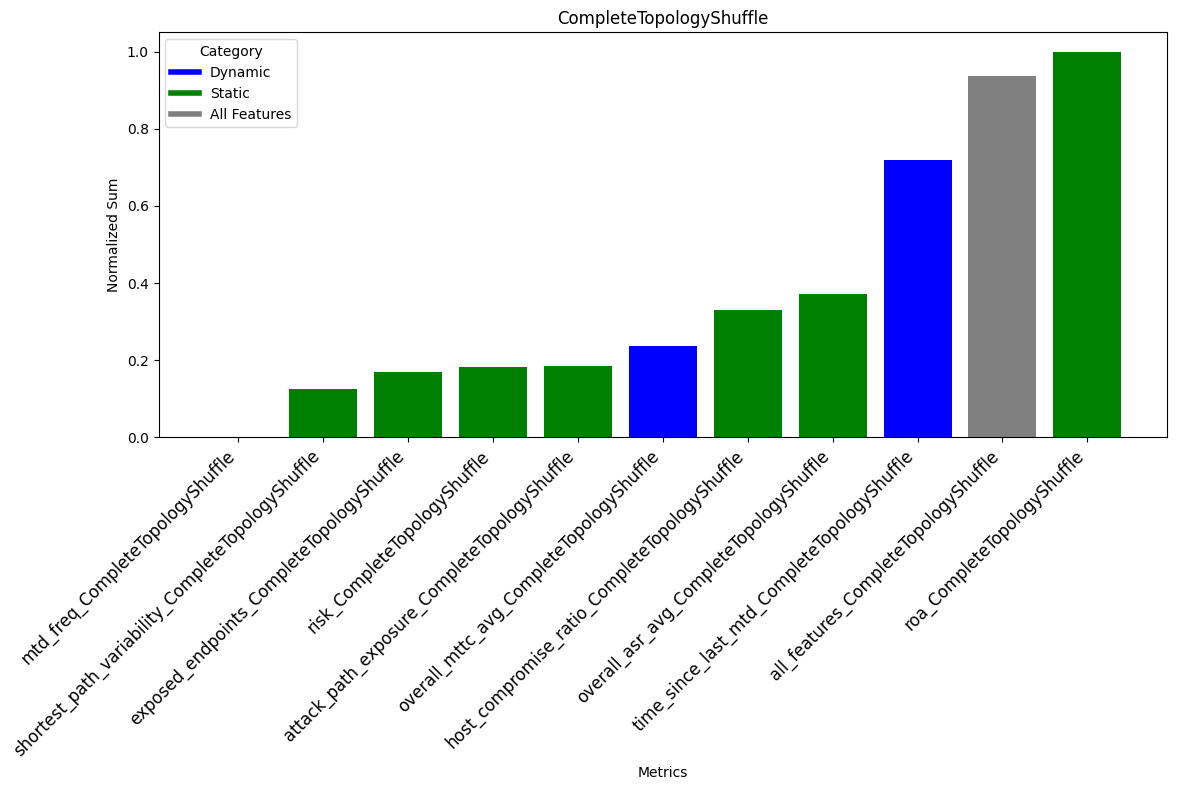

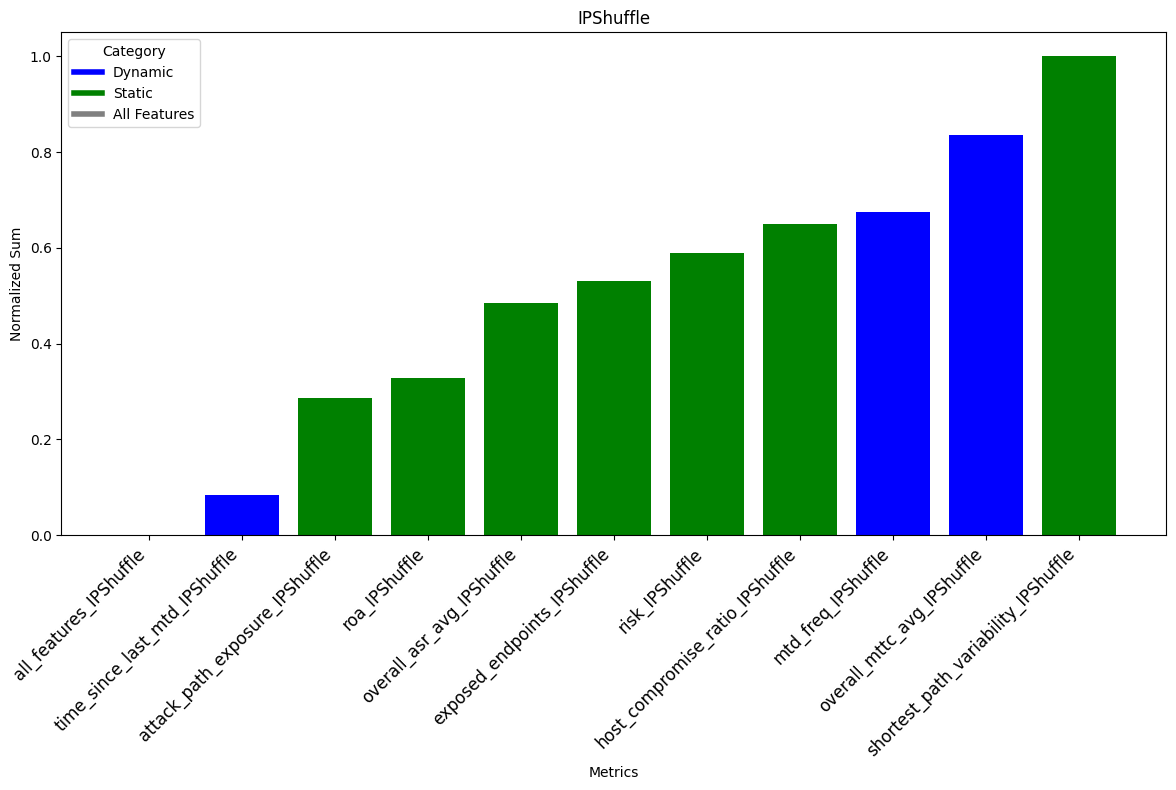

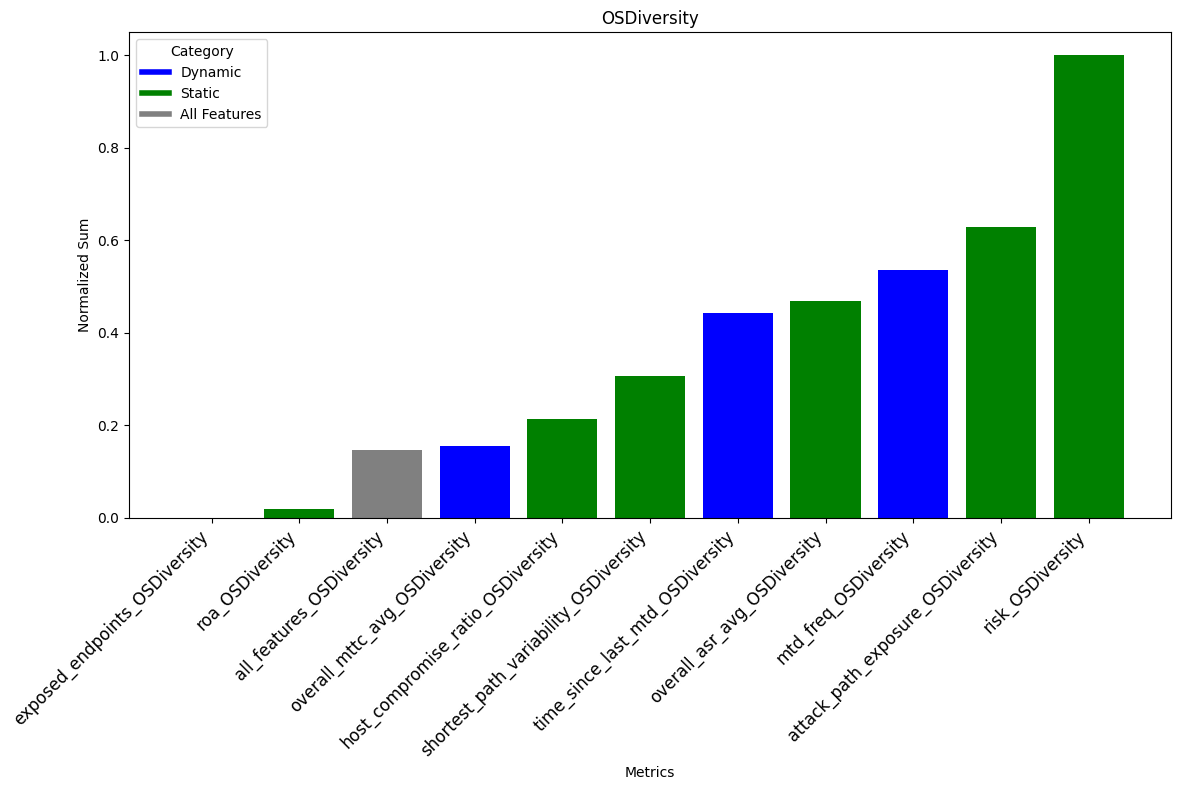

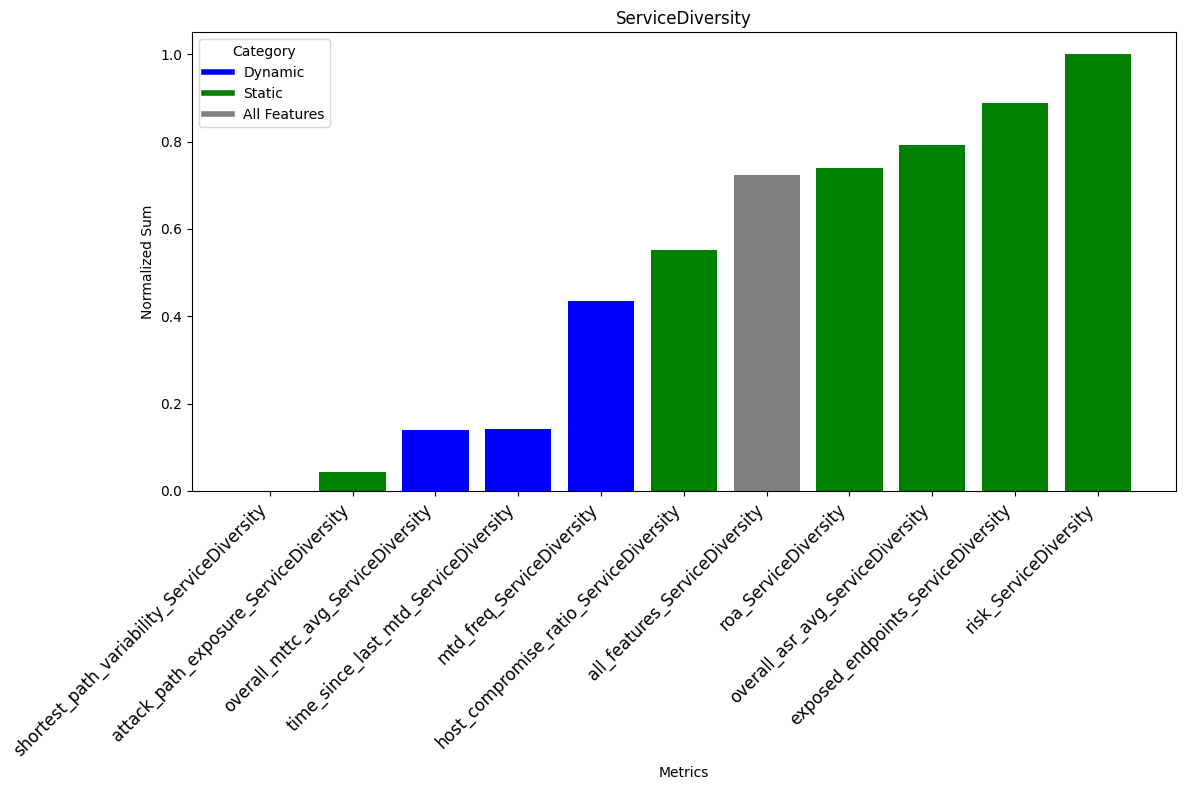

In [25]:
import matplotlib.pyplot as plt

def plot_metrics_by_category(data, groups, dynamic_metrics, static_metrics):
    """
    Plot metrics with color coding based on their category (Dynamic, Static, or All Features).

    Parameters:
    - data (dict): Dictionary with metric data.
    - groups (dict): Dictionary where keys are MTD names and values are lists of metrics.
    - dynamic_metrics (list): List of dynamic metrics.
    - static_metrics (list): List of static metrics.
    """
    # Create a color mapping
    colors = {'Dynamic': 'blue', 'Static': 'green', 'All Features': 'grey'}

    # Create legend handles
    handles = [plt.Line2D([0], [0], color=colors['Dynamic'], lw=4),
               plt.Line2D([0], [0], color=colors['Static'], lw=4),
               plt.Line2D([0], [0], color=colors['All Features'], lw=4)]
    labels = ['Dynamic', 'Static', 'All Features']

    for mtd in groups:
        # Extract and sort the data
        df = data[groups[mtd]].T
        
        sorted_columns = df.sort_values(by='sum', axis=0).index
        sorted_data = data[sorted_columns].loc['sum']


        min_sum = sorted_data.min()
        max_sum = sorted_data.max()
        sorted_data = (sorted_data - min_sum) / (max_sum - min_sum)


        # Plot
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot bars with colors based on category
        for metric in sorted_data.index:
            # Determine category based on metric name
            if any(dyn_metric in metric for dyn_metric in dynamic_metrics):
                category = 'Dynamic'
            elif any(static_metric in metric for static_metric in static_metrics):
                category = 'Static'
            else:
                category = 'All Features'

            ax.bar(metric, sorted_data[metric], color=colors[category])

        # Add labels, title, and legend
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Normalized Sum')
        ax.set_title(f'{mtd}')
        ax.set_xticklabels(sorted_data.index, rotation=45, ha='right', fontsize=12)
        ax.legend(handles=handles, labels=labels, title='Category')

        # Display the plot
        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming `data` and `groups` are defined, and the metric lists are provided
plot_metrics_by_category(data, groups, dynamic_metrics, static_metrics)


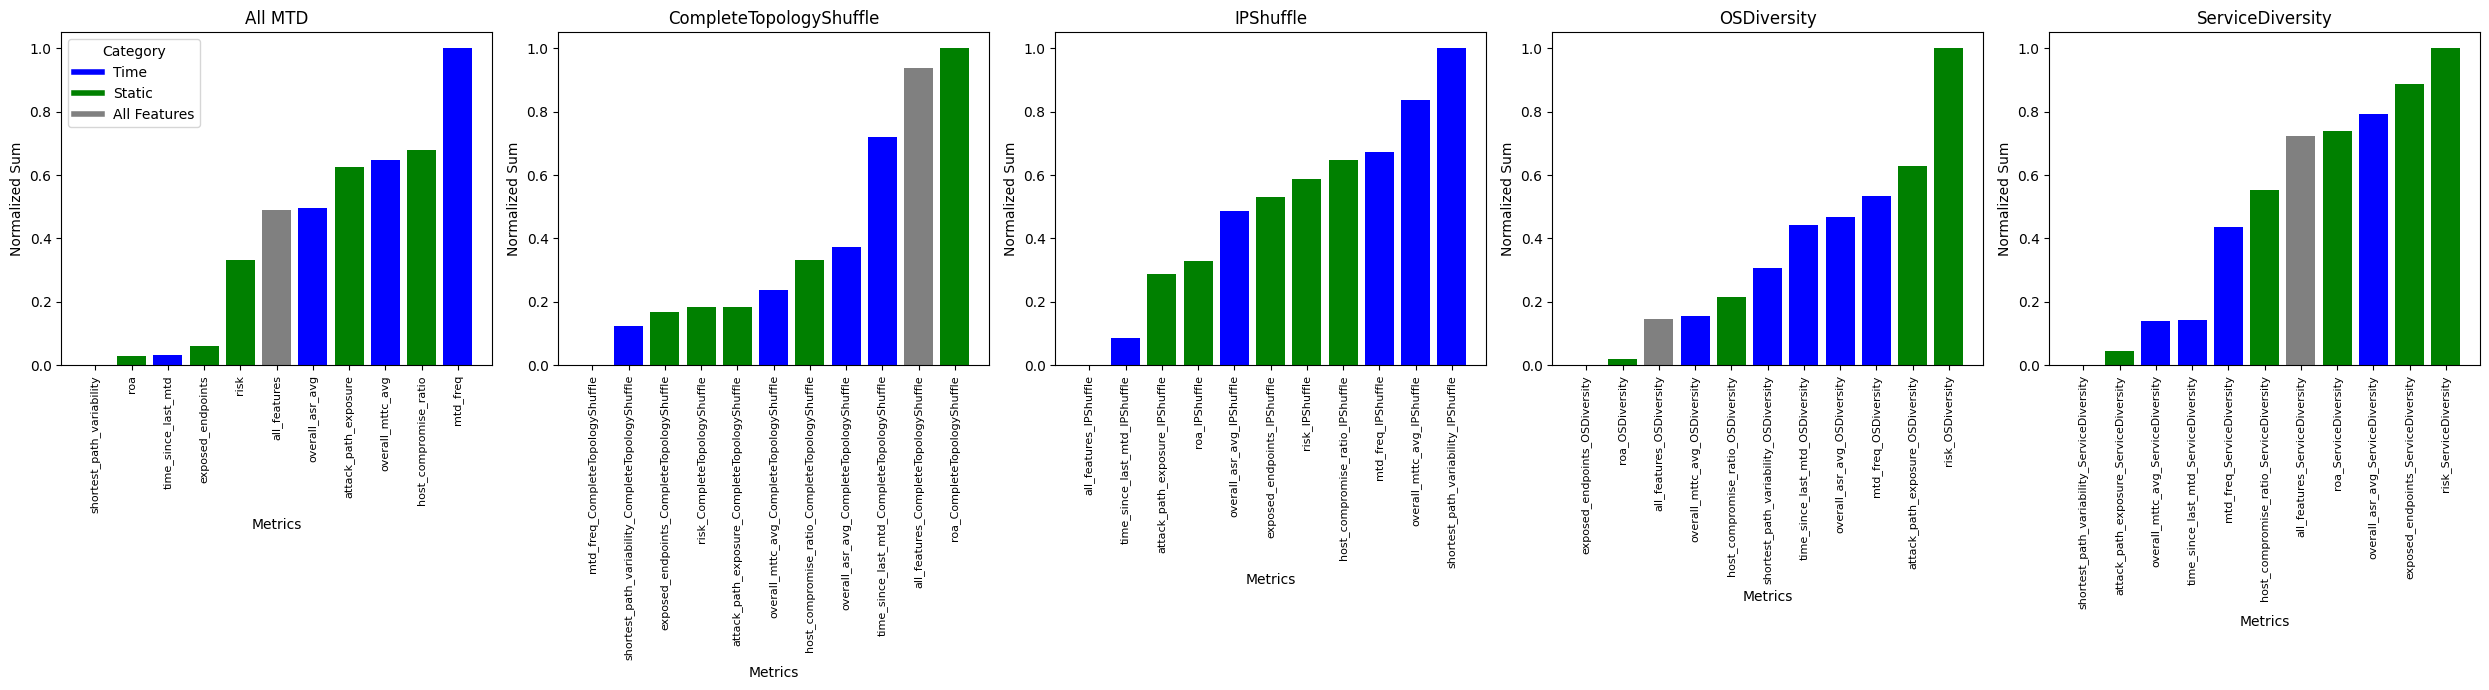

In [54]:
import matplotlib.pyplot as plt

def plot_metrics_by_category(data, groups, dynamic_metrics, static_metrics):
    """
    Plot metrics with color coding based on their category (Dynamic, Static, or All Features).
    Creates multiple subplots based on MTD strategies.

    Parameters:
    - data (dict): Dictionary with metric data.
    - groups (dict): Dictionary where keys are MTD names and values are lists of metrics.
    - dynamic_metrics (list): List of dynamic metrics.
    - static_metrics (list): List of static metrics.
    """
    # Create a color mapping
    colors = {'Time': 'blue', 'Static': 'green', 'All Features': 'grey'}

    # Create legend handles
    handles = [plt.Line2D([0], [0], color=colors['Time'], lw=4),
               plt.Line2D([0], [0], color=colors['Static'], lw=4),
               plt.Line2D([0], [0], color=colors['All Features'], lw=4)]
    labels = ['Time', 'Static', 'All Features']

    # Determine the number of subplots
    num_plots = len(groups)
    cols = 5  # Number of columns in subplot grid
    rows = (num_plots + 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(25, 7), squeeze=False)
    axes = axes.flatten()  # Flatten to easily index

    for idx, mtd in enumerate(groups):
        ax = axes[idx]

        # Extract and sort the data
        df = data[groups[mtd]].T
        
        sorted_columns = df.sort_values(by='sum', axis=0).index
        sorted_data = data[sorted_columns].loc['sum']

        # Normalize the data
        min_sum = sorted_data.min()
        max_sum = sorted_data.max()
        sorted_data = (sorted_data - min_sum) / (max_sum - min_sum)

        # Plot bars with colors based on category
        for metric in sorted_data.index:
            # Determine category based on metric name
            if any(dyn_metric in metric for dyn_metric in dynamic_metrics):
                category = 'Time'
            elif any(static_metric in metric for static_metric in static_metrics):
                category = 'Static'
            else:
                category = 'All Features'

            ax.bar(metric, sorted_data[metric], color=colors[category])

        # Add labels, title, and legend
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Normalized Sum')
        ax.set_title(f'{mtd}')
        ax.set_xticklabels(sorted_data.index, rotation=90, fontsize=8)

        if idx == 0:  # Only add legend to the first subplot
            ax.legend(handles=handles, labels=labels, title='Category')

    # Hide any unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `data`, `groups`, `dynamic_metrics`, and `static_metrics` are defined
plot_metrics_by_category(data, groups, dynamic_metrics, static_metrics)


In [27]:
import pandas as pd

def group_by_feature(df):
    # Initialize dictionaries to store median and standard deviation DataFrames
    medians = {}
    std_devs = {}

    for metric in metrics:
        # Find columns that start with the current prefix
        related_columns = [col for col in df.columns if metric in col]
        if related_columns:
            # Calculate the median for each related column
            median_df = df[related_columns].median(axis=1)
            medians[metric] = median_df

            # Calculate the standard deviation for each related column
            std_dev_df = df[related_columns].std(axis=1)
            std_devs[metric] = std_dev_df
    
    # Convert the results into DataFrames for better visualization
    medians_df = pd.DataFrame(medians)
    std_devs_df = pd.DataFrame(std_devs)

    return medians_df, std_devs_df

# Group by feature prefix and calculate the median and standard deviation
medians_df, std_devs_df = group_by_feature(data)


In [28]:
medians_df 

,all_features,exposed_endpoints,host_compromise_ratio,attack_path_exposure,roa,risk,shortest_path_variability,overall_asr_avg,time_since_last_mtd,overall_mttc_avg,mtd_freq
ASR,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.524298
time_to_compromise,1.545631,1.526280,1.535351,1.538282,1.530499,1.526909,1.533368,1.529911,1.530234,1.526821,1.543244
attack_path_exposure,2.451284,2.478623,2.460476,2.428102,2.494779,2.467158,2.491621,2.456382,2.460476,2.440142,2.481152
ROA,1.138042,1.141477,1.150830,1.092327,1.133929,1.148476,1.078448,1.132470,1.103751,1.121795,1.128444
risk,1.056053,1.061148,1.046188,1.024170,1.040997,1.055540,1.014949,1.060955,1.043271,1.040615,1.062859
sum,7.693023,7.627492,7.721734,7.713696,7.622968,7.669121,7.618386,7.693699,7.623241,7.716802,7.770475


In [29]:
std_devs_df

,all_features,exposed_endpoints,host_compromise_ratio,attack_path_exposure,roa,risk,shortest_path_variability,overall_asr_avg,time_since_last_mtd,overall_mttc_avg,mtd_freq
ASR,0.053432,0.069722,0.077080,0.060540,0.069943,0.060221,0.060221,0.078567,0.055150,0.059252,0.066952
time_to_compromise,0.090697,0.093856,0.093372,0.097437,0.087402,0.095502,0.097449,0.092533,0.092192,0.098540,0.102035
attack_path_exposure,0.313811,0.335155,0.304881,0.309325,0.311376,0.312361,0.302451,0.342173,0.310102,0.327177,0.302352
ROA,0.042284,0.039083,0.035674,0.041478,0.045451,0.064150,0.061883,0.035651,0.050813,0.058417,0.050850
risk,0.032110,0.044288,0.017057,0.041519,0.040571,0.036828,0.059809,0.024377,0.043024,0.052261,0.041878
sum,0.398864,0.389154,0.367710,0.411221,0.358385,0.436712,0.346443,0.398380,0.392432,0.345364,0.403318


In [30]:
medians_data  = medians_df.T.sort_values("sum", axis=0)
std_devs_data = std_devs_df.T.sort_values("sum", axis=0)

In [31]:
min_sum = medians_data.min()
max_sum = medians_data.max()
medians_data = (medians_data - min_sum) / (max_sum - min_sum)


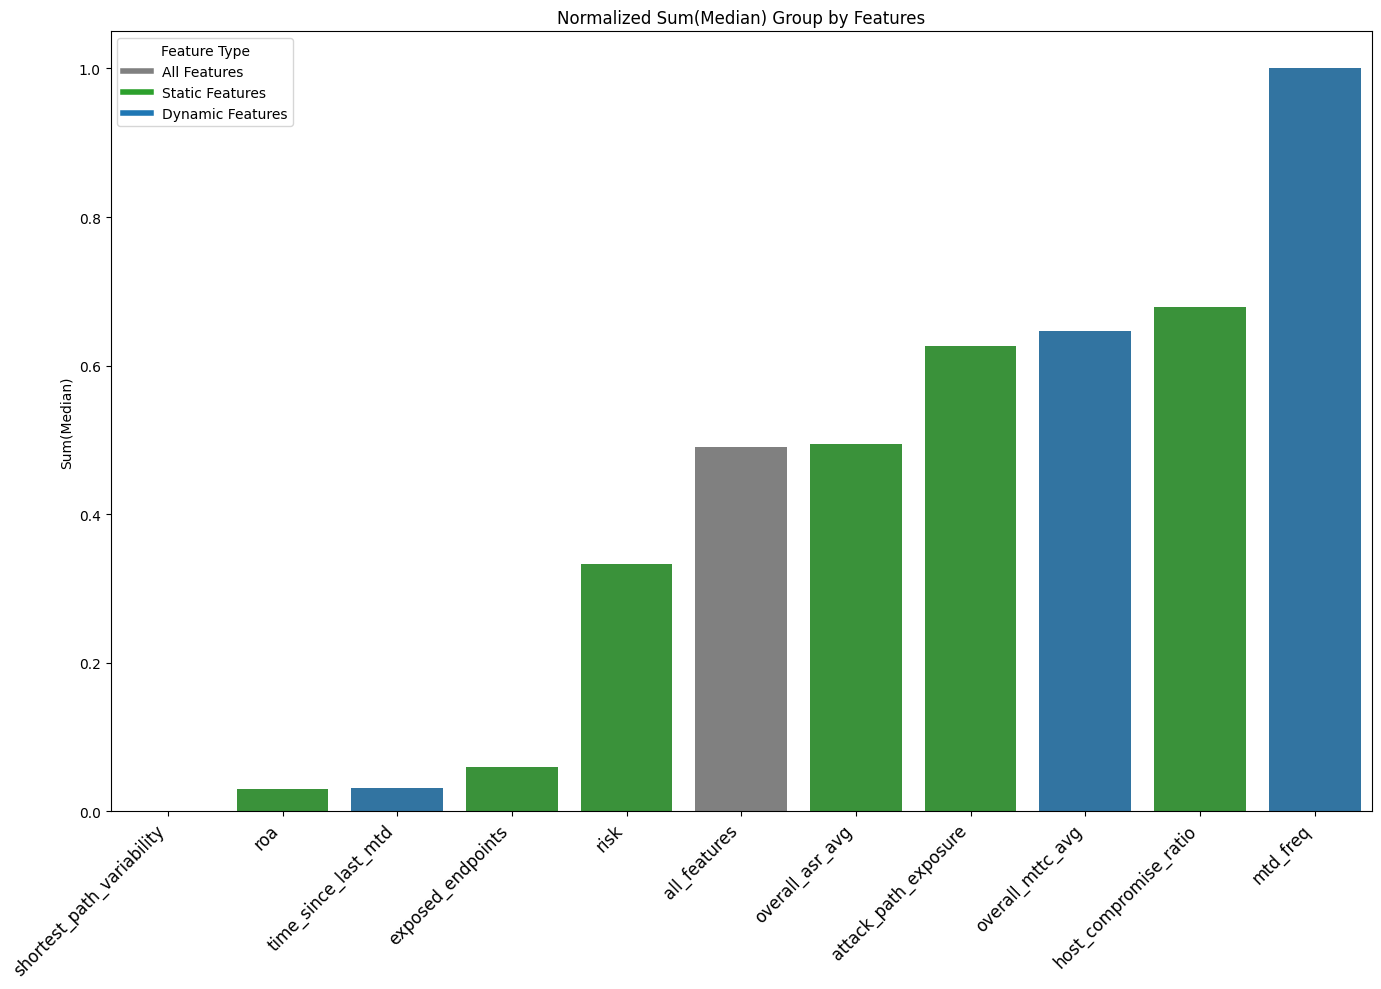

In [32]:
# Define colors for each feature type
colors = {
    'all_features': 'grey',  # Blue
    'static_features': '#2ca02c',  # Orange
    'dynamic_features':  '#1f77b4' # Green
}

# Define labels for the legend
labels = {
    'all_features': 'All Features',
    'static_features': 'Static Features',
    'dynamic_features': 'Dynamic Features'
}

# Function to determine the color for each feature
def get_color(feature):
    if feature == 'all_features':
        return colors['all_features']
    elif feature in static_metrics:
        return colors['static_features']
    elif feature in dynamic_metrics:
        return colors['dynamic_features']
    return '#000000'  # Default color for unknown features

# Map feature names to colors
color_list = [get_color(feature) for feature in medians_data.index]

# Create a bar plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 10))
# ax.errorbar(medians_data.index, medians_data['sum'], yerr=std_devs_data['sum'], fmt='none', color='black', capsize=5, capthick=2)

# Create the bar plot with specific colors
barplot = sns.barplot(x=medians_data.index, y=medians_data['sum'], palette=color_list)

# Set the y-label to 'Sum(Median)'
plt.ylabel('Sum(Median)')

# Set title and labels for x-ticks with rotation and font size
plt.title("Normalized Sum(Median) Group by Features")
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-tick labels for better readability

# Create custom legend
handles = [plt.Line2D([0], [0], color=colors[key], linewidth=4) for key in colors]
plt.legend(handles, [labels[key] for key in colors], title='Feature Type')

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `data` is your DataFrame containing all the data

# List of dynamic metrics
dynamic_metrics = [
    'time_since_last_mtd', 'overall_mttc_avg', 'mtd_freq', 'shortest_path_variability', 'overall_asr_avg'
]

# Filter out columns that contain 'Diversity' and dynamic metrics
filtered_columns = [col for col in data.columns 
                    if 'Diversity' in col and any(metric in col for metric in dynamic_metrics)]

# Create a filtered DataFrame
filtered_data = data[filtered_columns]
overall_result = pd.concat([pd.DataFrame(filtered_data), other_schemes], axis=1)



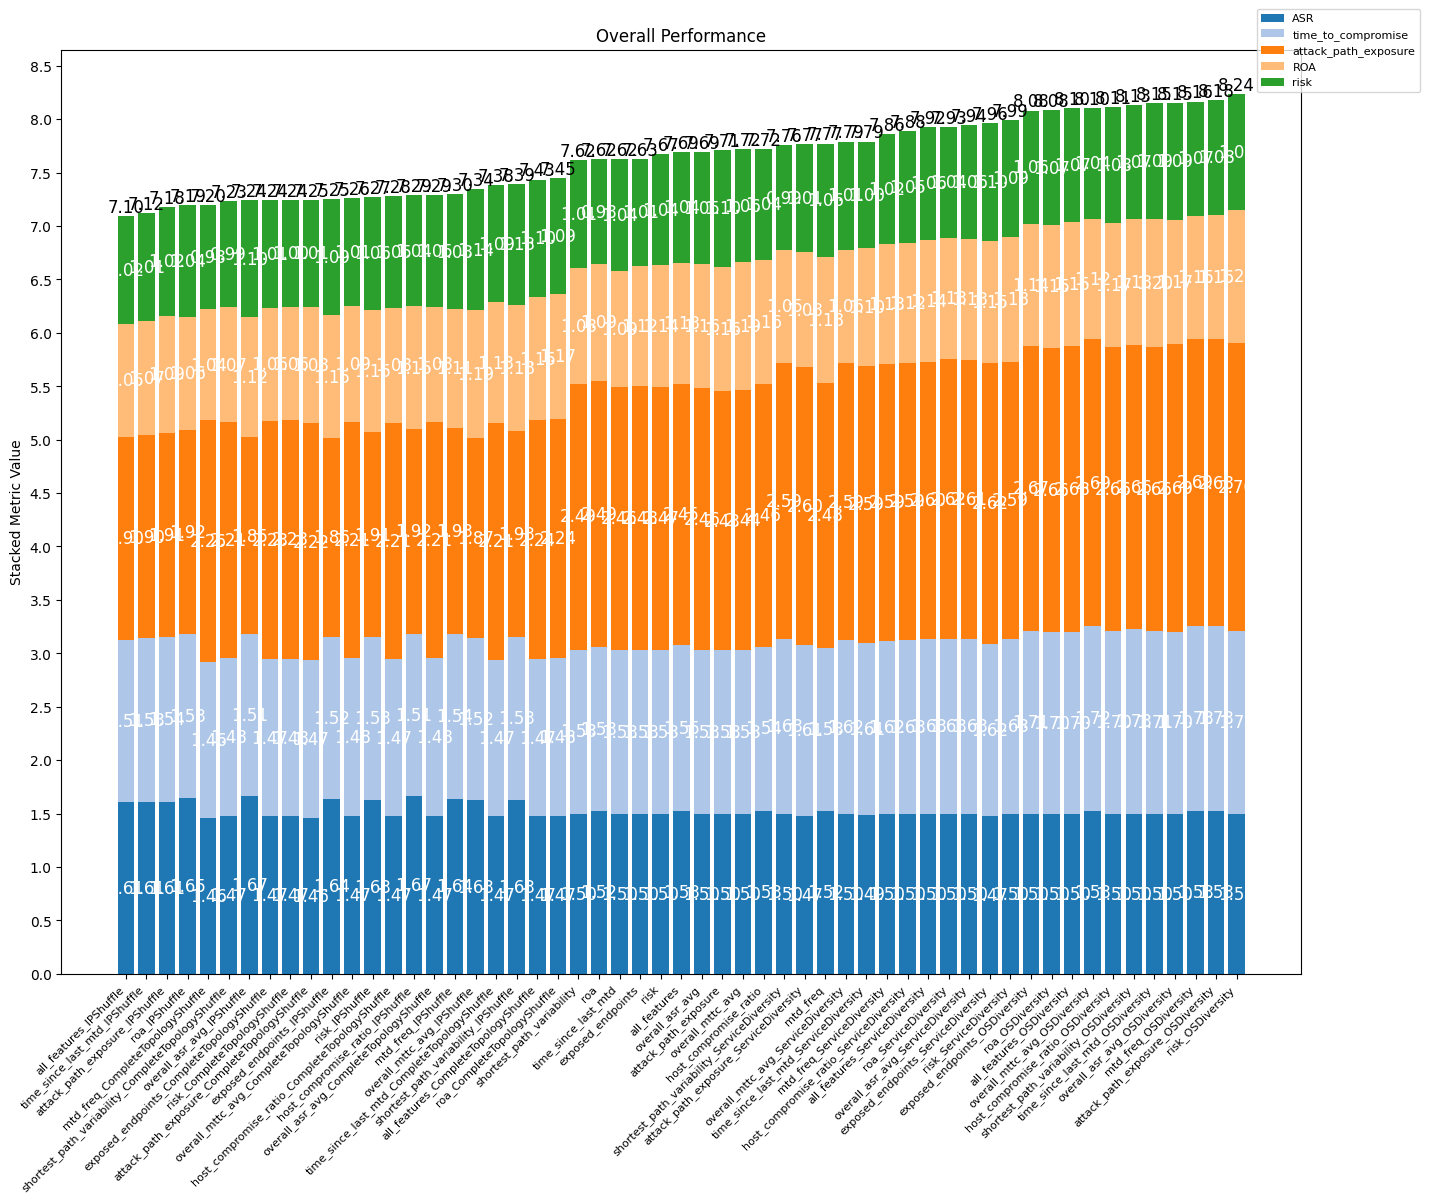

In [34]:
chart.plot_n_schemes(font_size=8, title="Overall Performance")

In [35]:
for metric in metrics:
    matched_columns = data[data.columns[data.columns.str.contains(metric)]]


In [36]:
matched_columns

,mtd_freq,mtd_freq_CompleteTopologyShuffle,mtd_freq_IPShuffle,mtd_freq_OSDiversity,mtd_freq_ServiceDiversity
ASR,1.524298,1.458333,1.638889,1.527778,1.500000
time_to_compromise,1.525009,1.464125,1.543244,1.730243,1.616799
attack_path_exposure,2.481152,2.257318,1.929785,2.686598,2.589975
ROA,1.177157,1.043584,1.108341,1.152389,1.128444
risk,1.062859,0.975207,1.075698,1.066863,1.022666
sum,7.770475,7.198567,7.295957,8.163872,7.857883


In [37]:
new_data = data

In [38]:
new_data.loc['rank'] = new_data.T['sum'].rank(ascending=True)

In [39]:
new_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
ASR,1.527778,1.472222,1.611111,1.500000,1.500000,1.527778,1.472222,1.666667,1.500000,1.500000,...,1.500000,1.472222,1.625000,1.527778,1.500000,1.500000,1.472222,1.611111,1.500000,1.489510
time_to_compromise,1.545631,1.472419,1.512724,1.696604,1.629049,1.535351,1.473507,1.514567,1.704895,1.625636,...,1.526821,1.481007,1.520235,1.724911,1.622033,1.530234,1.467154,1.528115,1.706132,1.609597
attack_path_exposure,2.451284,2.236797,1.903657,2.684156,2.601385,2.460476,2.211664,1.916010,2.659974,2.589975,...,2.440142,2.211664,1.872610,2.689045,2.592249,2.460476,2.211664,1.901963,2.659974,2.589975
ROA,1.128493,1.149689,1.050264,1.152941,1.138042,1.156150,1.078217,1.150830,1.167001,1.122988,...,1.191539,1.087530,1.190861,1.121795,1.064459,1.089260,1.133597,1.066705,1.198155,1.103751
risk,1.039836,1.103160,1.017596,1.069052,1.056053,1.041980,1.046188,1.040440,1.081417,1.046215,...,1.058301,1.005719,1.135306,1.040615,1.010882,1.043271,1.094836,1.012745,1.085041,0.997177
sum,7.693023,7.434287,7.095351,8.102752,7.924528,7.721734,7.281797,7.288514,8.113288,7.884814,...,7.716802,7.258143,7.344012,8.104143,7.789622,7.623241,7.379473,7.120640,8.149303,7.790010
rank,28.000000,21.000000,1.000000,47.000000,40.000000,32.000000,14.000000,15.000000,49.000000,39.000000,...,31.000000,12.000000,18.000000,48.000000,36.000000,25.000000,19.000000,2.000000,51.000000,37.000000


In [40]:
import pandas as pd

# Example list of metrics
metrics = ['all_features', 'exposed_endpoints', 'host_compromise_ratio', 'attack_path_exposure', 'roa', 
           'risk', 'time_since_last_mtd', 'overall_mttc_avg', 'mtd_freq', 'shortest_path_variability', 'overall_asr_avg']

# Sample data (replace new_data with your actual DataFrame)
# Assume `new_data` has a 'rank' column and relevant metric columns to filter on

# Initialize an empty dictionary to store metric rankings
ranking = {
    'metric': [],
    'median': [],
    'std': []
}

# Loop through each metric and calculate the median and standard deviation
for metric in metrics:
    # Filter the DataFrame for the columns that contain the metric name
    rank = new_data[new_data.columns[new_data.columns.str.contains(metric)]]
    
    # Calculate the median and standard deviation for 'rank' row
    rank_median = rank.loc['rank'].median()
    rank_std = rank.loc['rank'].std()
    
    # Append the results to the ranking dictionary
    ranking['metric'].append(metric)
    ranking['median'].append(rank_median)
    ranking['std'].append(rank_std)

# Convert the ranking dictionary to a DataFrame
ranking_df = pd.DataFrame(ranking).sort_values(by='median')

# Print the DataFrame for verification
print(ranking_df)


                       metric  median        std
9   shortest_path_variability    23.0  16.349312
4                         roa    24.0  16.727223
6         time_since_last_mtd    25.0  18.498649
1           exposed_endpoints    26.0  17.300289
5                        risk    27.0  19.743353
0                all_features    28.0  17.896927
10            overall_asr_avg    29.0  18.376616
3        attack_path_exposure    30.0  20.302709
7            overall_mttc_avg    31.0  14.352700
2       host_compromise_ratio    32.0  15.221695
8                    mtd_freq    35.0  18.782971


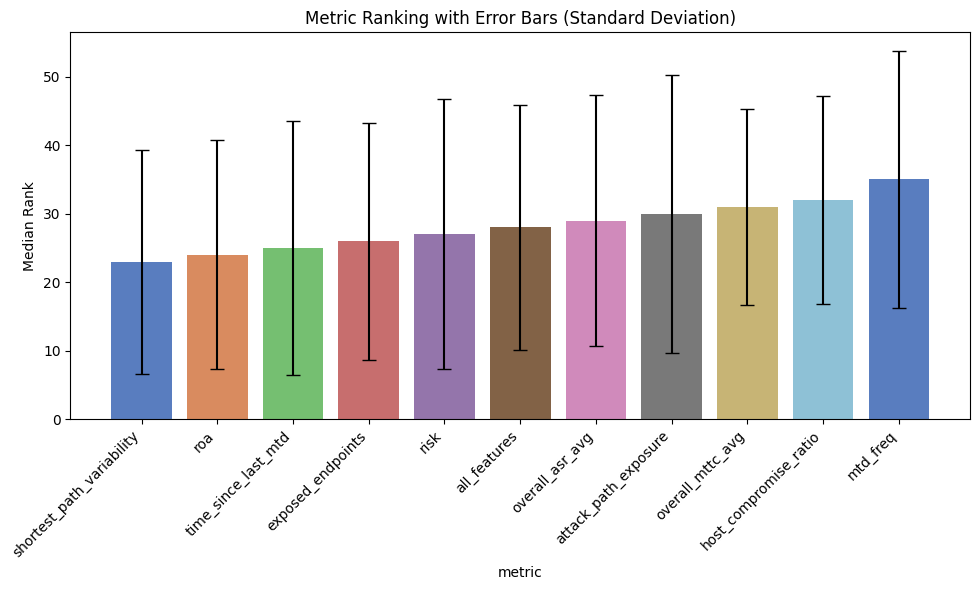

In [41]:
# Plotting using Seaborn for bar plot and error bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='metric', y='median', data=ranking_df, palette='muted', capsize=0.2)

# Add error bars
ax.errorbar(ranking_df['metric'], ranking_df['median'], yerr=ranking_df['std'], fmt='none', c='black', capsize=5)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.ylabel('Median Rank')
plt.title('Metric Ranking with Error Bars (Standard Deviation)')
plt.tight_layout()
# plt.legend()
# Show the plot
plt.show()

In [42]:
new_data[new_data.columns[new_data.columns.str.contains('risk')]]

,risk,risk_CompleteTopologyShuffle,risk_IPShuffle,risk_OSDiversity,risk_ServiceDiversity
ASR,1.500000,1.472222,1.625000,1.500000,1.500000
time_to_compromise,1.526909,1.476056,1.526868,1.711237,1.634181
attack_path_exposure,2.467158,2.231564,1.914767,2.696412,2.589975
ROA,1.137045,1.061129,1.148476,1.238234,1.175040
risk,1.038009,1.003559,1.055540,1.091240,1.089324
sum,7.669121,7.244529,7.270651,8.237124,7.988520
rank,27.000000,9.000000,13.000000,55.000000,44.000000


In [43]:
new_data[new_data.columns[new_data.columns.str.contains('shortest_path_variability')]]

,shortest_path_variability,shortest_path_variability_CompleteTopologyShuffle,shortest_path_variability_IPShuffle,shortest_path_variability_OSDiversity,shortest_path_variability_ServiceDiversity
ASR,1.500000,1.472222,1.625000,1.500000,1.500000
time_to_compromise,1.533368,1.481836,1.527829,1.725025,1.629210
attack_path_exposure,2.491621,2.211664,1.929785,2.659974,2.589975
ROA,1.078448,1.071264,1.181247,1.175519,1.051137
risk,1.014949,0.993124,1.129135,1.067252,0.986988
sum,7.618386,7.230110,7.392996,8.127770,7.757310
rank,23.000000,6.000000,20.000000,50.000000,33.000000


In [44]:
new_data[new_data.columns[new_data.columns.str.contains('overall_asr_avg')]]

,overall_asr_avg,overall_asr_avg_CompleteTopologyShuffle,overall_asr_avg_IPShuffle,overall_asr_avg_OSDiversity,overall_asr_avg_ServiceDiversity
ASR,1.500000,1.472222,1.666667,1.500000,1.500000
time_to_compromise,1.529911,1.483159,1.510206,1.702064,1.634051
attack_path_exposure,2.456382,2.211664,1.845357,2.689045,2.612895
ROA,1.160136,1.078382,1.121762,1.168230,1.132470
risk,1.047269,1.046866,1.095875,1.094058,1.060955
sum,7.693699,7.292293,7.239867,8.153396,7.940372
rank,29.000000,16.000000,7.000000,52.000000,42.000000


In [45]:
new_data[new_data.columns[new_data.columns.str.contains('mtd_freq')]]

,mtd_freq,mtd_freq_CompleteTopologyShuffle,mtd_freq_IPShuffle,mtd_freq_OSDiversity,mtd_freq_ServiceDiversity
ASR,1.524298,1.458333,1.638889,1.527778,1.500000
time_to_compromise,1.525009,1.464125,1.543244,1.730243,1.616799
attack_path_exposure,2.481152,2.257318,1.929785,2.686598,2.589975
ROA,1.177157,1.043584,1.108341,1.152389,1.128444
risk,1.062859,0.975207,1.075698,1.066863,1.022666
sum,7.770475,7.198567,7.295957,8.163872,7.857883
rank,35.000000,5.000000,17.000000,53.000000,38.000000


In [46]:
import pandas as pd

# Assuming new_data is your original DataFrame
# Example DataFrame creation (you can skip this if you already have new_data)
# new_data = pd.DataFrame({
#     'risk_A': [0.1, 0.2, 0.3],
#     'risk_B': [0.4, 0.5, 0.6],
#     'shortest_path_variability_A': [0.7, 0.8, 0.9],
#     'overall_asr_avg': [0.1, 0.2, 0.3],
#     'mtd_freq': [0.4, 0.5, 0.6],
#     'other_metric': [1.0, 1.1, 1.2]
# })

# Filter columns based on substrings
# risk_cols = new_data[new_data.columns[new_data.columns.str.contains('risk')]]
# spv_cols = new_data[new_data.columns[new_data.columns.str.contains('shortest_path_variability')]]
# asr_cols = new_data[new_data.columns[new_data.columns.str.contains('overall_asr_avg')]]
mtd_freq_cols = new_data[new_data.columns[new_data.columns.str.contains('mtd_freq')]]

# Concatenate these columns together
# top_data = pd.concat([risk_cols, spv_cols, asr_cols, mtd_freq_cols], axis=1)
top_data = pd.concat([mtd_freq_cols], axis=1)
# top_data = pd.concat([mtd_freq_cols, spv_cols, mtd_freq_cols], axis=1)


In [47]:
top_data.T

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,rank
mtd_freq,1.524298,1.525009,2.481152,1.177157,1.062859,7.770475,35.0
mtd_freq_CompleteTopologyShuffle,1.458333,1.464125,2.257318,1.043584,0.975207,7.198567,5.0
mtd_freq_IPShuffle,1.638889,1.543244,1.929785,1.108341,1.075698,7.295957,17.0
mtd_freq_OSDiversity,1.527778,1.730243,2.686598,1.152389,1.066863,8.163872,53.0
mtd_freq_ServiceDiversity,1.500000,1.616799,2.589975,1.128444,1.022666,7.857883,38.0


In [48]:
overall_result

,overall_asr_avg_OSDiversity,overall_asr_avg_ServiceDiversity,shortest_path_variability_OSDiversity,shortest_path_variability_ServiceDiversity,mtd_freq_OSDiversity,mtd_freq_ServiceDiversity,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity,random,alternative,simultaneous
ASR,1.500000,1.500000,1.500000,1.500000,1.527778,1.500000,1.527778,1.500000,1.500000,1.489510,1.472222,1.458333,2.708333
time_to_compromise,1.702064,1.634051,1.725025,1.629210,1.730243,1.616799,1.724911,1.622033,1.706132,1.609597,1.460395,1.454281,1.736429
attack_path_exposure,2.689045,2.612895,2.659974,2.589975,2.686598,2.589975,2.689045,2.592249,2.659974,2.589975,0.934826,0.933711,0.936514
ROA,1.168230,1.132470,1.175519,1.051137,1.152389,1.128444,1.121795,1.064459,1.198155,1.103751,0.969766,0.880455,0.994225
risk,1.094058,1.060955,1.067252,0.986988,1.066863,1.022666,1.040615,1.010882,1.085041,0.997177,0.943190,0.956910,1.061994
sum,8.153396,7.940372,8.127770,7.757310,8.163872,7.857883,8.104143,7.789622,8.149303,7.790010,NaN,NaN,NaN


In [49]:
result = top_data.T.drop(['sum', 'rank'], axis=1, errors='ignore')
overall_result = pd.concat([result.T, other_schemes], axis=1)

In [50]:
chart.process_weighted_metrics(overall_result)

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
mtd_freq,1.524298,1.525009,2.481152,1.177157,1.062859,7.770475,0.669193,0.841384
mtd_freq_CompleteTopologyShuffle,1.458333,1.464125,2.257318,1.043584,0.975207,7.198567,0.053826,0.610793
mtd_freq_IPShuffle,1.638889,1.543244,1.929785,1.108341,1.075698,7.295957,0.158616,0.650060
mtd_freq_OSDiversity,1.527778,1.730243,2.686598,1.152389,1.066863,8.163872,1.092484,1.000000
mtd_freq_ServiceDiversity,1.500000,1.616799,2.589975,1.128444,1.022666,7.857883,0.763243,0.876626
random,1.472222,1.460395,0.934826,0.969766,0.943190,5.780400,-1.472107,0.038993
alternative,1.458333,1.454281,0.933711,0.880455,0.956910,5.683690,-1.576166,0.000000
simultaneous,2.708333,1.736429,0.936514,0.994225,1.061994,7.437495,0.310910,0.707128


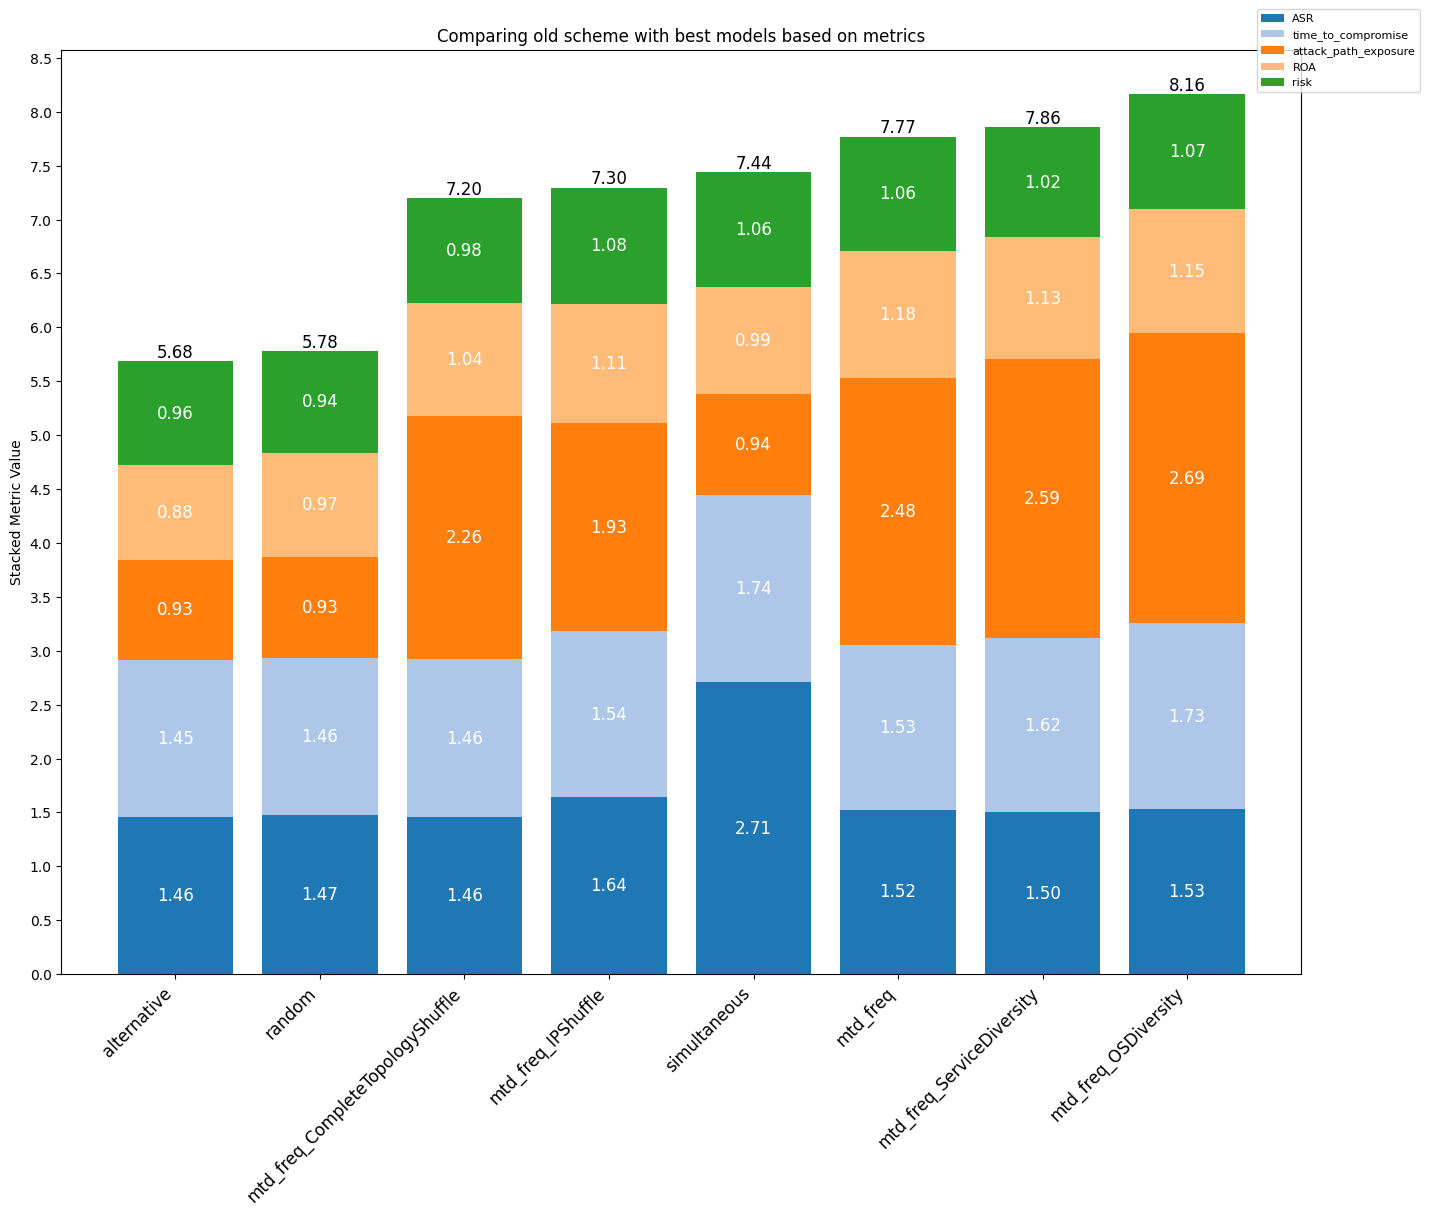

In [51]:
chart.plot_n_schemes(font_size=12, title="Comparing old scheme with best models based on metrics")